# James Ajeeth J - E20013

# Importing Libraries

In [149]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

# Importing and Understanding the dataset

In [143]:
#Changing the working directory
os.chdir('C://Users//Thanis//Desktop//Data Science//Machine Learing//Housing')

In [318]:
#reading the file to dataframe
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')

In [145]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [146]:
h_train.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [5]:
h_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.761000e+03,9.761000e+03,9761.000000,9761.000000,9761.000000,9.761000e+03,9761.000000,9761.000000,9761.000000,9761.000000,9761.00000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000,9761.000000
mean,4.605288e+09,5.427350e+05,3.375884,2.117175,2086.734146,1.521526e+04,1.486067,0.008401,0.248028,3.415531,7.66151,1793.291159,293.442987,1970.799508,86.066592,98077.790185,47.560052,-122.214322,1992.359697,12824.785165
std,2.876044e+09,3.795276e+05,0.960697,0.773971,927.194303,4.126673e+04,0.532317,0.091275,0.787877,0.650552,1.18268,835.763817,442.612722,29.240009,405.417369,53.203594,0.140236,0.139895,687.322247,26518.337402
min,1.200019e+06,8.000000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.00000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.514000,620.000000,660.000000
25%,2.126049e+09,3.200000e+05,3.000000,1.750000,1420.000000,5.100000e+03,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.467800,-122.327000,1490.000000,5160.000000
50%,3.905041e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.642000e+03,1.500000,0.000000,0.000000,3.000000,7.00000,1570.000000,0.000000,1975.000000,0.000000,98065.000000,47.572200,-122.229000,1840.000000,7660.000000
75%,7.338403e+09,6.490000e+05,4.000000,2.500000,2570.000000,1.066000e+04,2.000000,0.000000,0.000000,4.000000,8.00000,2230.000000,570.000000,1996.000000,0.000000,98117.000000,47.680400,-122.126000,2370.000000,10113.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.00000,8860.000000,3480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.319000,5790.000000,560617.000000


 From description we can infer that

1. Avg price of house sold in King County, USA is $5427350.

2. Max price of house sold in King County, USA is $7700000.

3. Avg no. of bedrooms in houses sold in KC is 3/House with 2 bathrooms /bedroom with one house is having 33 Bedrooms

4. Avg area of house is 2086 Sqft with one house having 12050 Sqft. area


# Exploratory Data Analysis

# Univariant Analysis

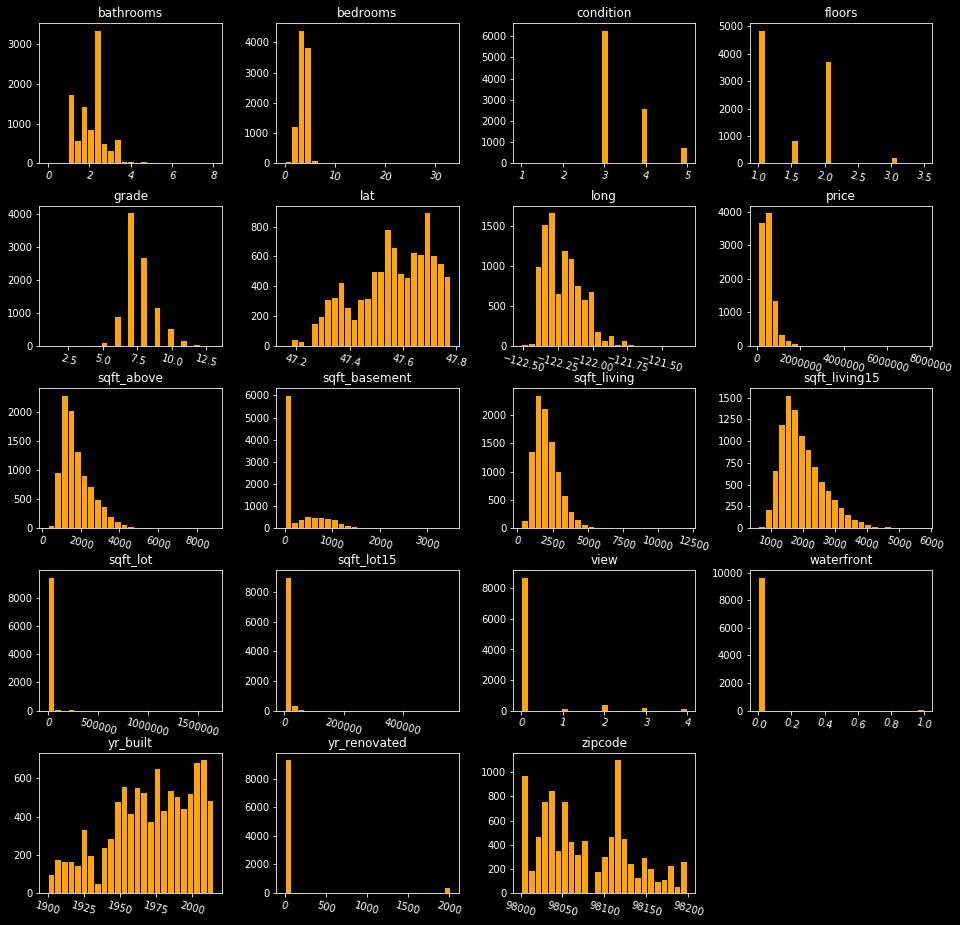

In [303]:
plt.style.use('dark_background')
h_train1=h_train[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = h_train1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15,color = "orange",edgecolor='black',grid=False)

# Bivariant Analysis

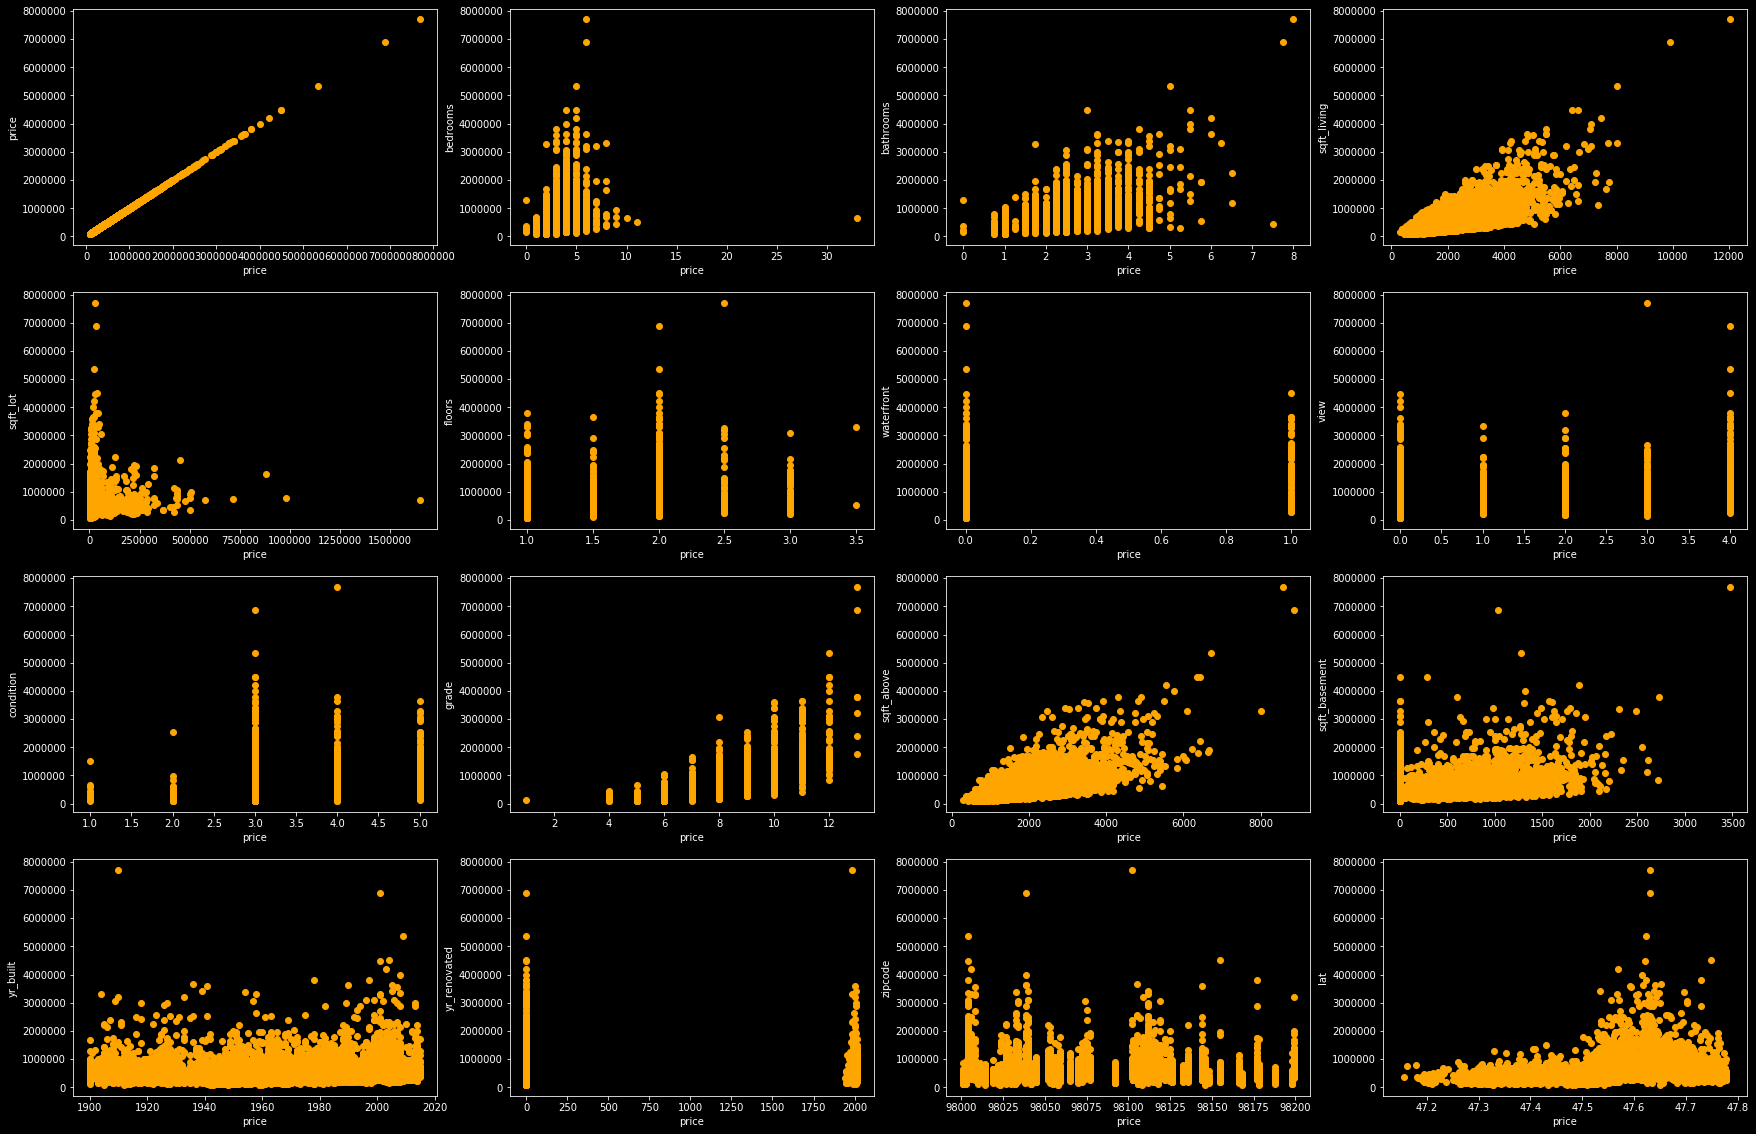

In [183]:
#plt.style.use('dark_background')
ncols = 4
nrows = int(len(h_train1.columns) / (1.0*ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20))

counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        if counter < len(h_train.columns):

            ax.scatter(h_train[h_train1.columns[counter]],h_train['price'], color='orange')
            ax.set_ylabel(h_train1.columns[counter])
            ax.set_xlabel('price')
        counter += 1

plt.show()

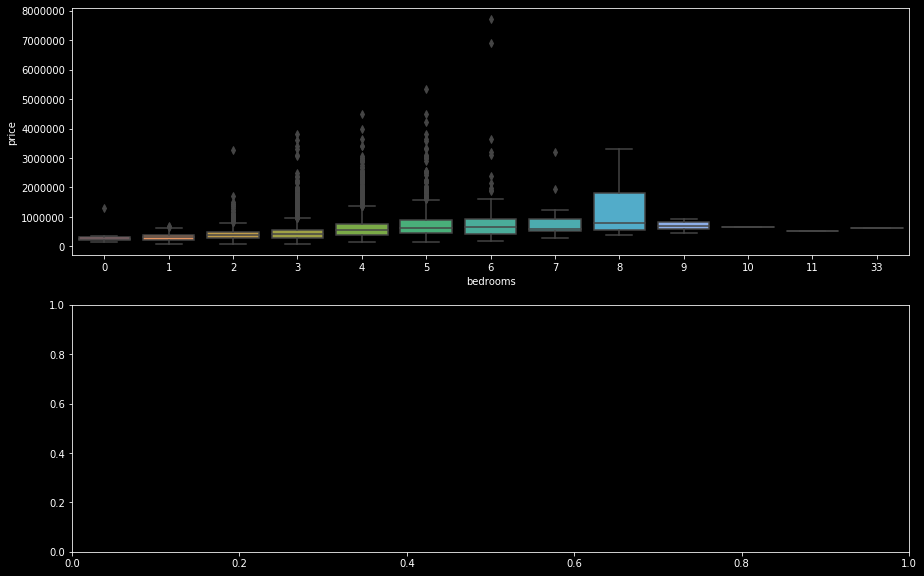

In [182]:
h_train2=h_train[['bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
_ , axes = plt.subplots(2, 1, figsize=(15,10))
sns.boxplot(x= h_train['bedrooms'], y= h_train['price'],ax = axes[0])

# Correlation Matrix

In [186]:
corrMatrix = h_train.corr()
corrMatrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.005972,-0.002571,0.005821,-0.007559,-0.130303,0.007793,0.000834,0.023355,-0.015321,0.012491,-0.006447,-0.003660,0.027053,-0.024900,-0.012130,0.009167,0.034395,-0.001315,-0.137562
price,-0.005972,1.000000,0.300808,0.527532,0.705052,0.094143,0.262954,0.274977,0.399658,0.044732,0.665567,0.611453,0.322383,0.051759,0.120472,-0.055629,0.299280,0.023754,0.584807,0.077943
bedrooms,-0.002571,0.300808,1.000000,0.506070,0.560989,0.028895,0.181042,-0.006803,0.079863,0.036135,0.342305,0.462514,0.301829,0.155102,0.018625,-0.148339,-0.010547,0.117168,0.376457,0.018149
bathrooms,0.005821,0.527532,0.506070,1.000000,0.758930,0.079435,0.501899,0.061483,0.182988,-0.115382,0.660925,0.692911,0.281433,0.499589,0.044756,-0.201454,0.018453,0.217697,0.566076,0.068722
sqft_living,-0.007559,0.705052,0.560989,0.758930,1.000000,0.162786,0.366219,0.097203,0.285735,-0.047938,0.764819,0.878989,0.435069,0.322723,0.043627,-0.203761,0.054830,0.240170,0.758081,0.163545
sqft_lot,-0.130303,0.094143,0.028895,0.079435,0.162786,1.000000,-0.003543,0.029420,0.099221,-0.008722,0.115611,0.180913,-0.000601,0.054043,0.001219,-0.126091,-0.092245,0.224524,0.145285,0.719922
floors,0.007793,0.262954,0.181042,0.501899,0.366219,-0.003543,1.000000,0.022443,0.031938,-0.265390,0.461545,0.534801,-0.242675,0.481926,0.013655,-0.064479,0.044827,0.134683,0.289238,-0.013269
waterfront,0.000834,0.274977,-0.006803,0.061483,0.097203,0.029420,0.022443,1.000000,0.402725,0.024030,0.088039,0.064297,0.082214,-0.027010,0.101684,0.023656,-0.009410,-0.039227,0.097196,0.028499
view,0.023355,0.399658,0.079863,0.182988,0.285735,0.099221,0.031938,0.402725,1.000000,0.059969,0.258123,0.170286,0.277021,-0.056361,0.109750,0.075834,0.005503,-0.074630,0.292435,0.079904
condition,-0.015321,0.044732,0.036135,-0.115382,-0.047938,-0.008722,-0.265390,0.024030,0.059969,1.000000,-0.133313,-0.153713,0.189828,-0.357396,-0.055525,0.003410,-0.017622,-0.106514,-0.080423,0.002253


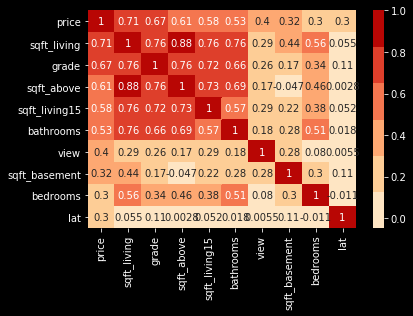

In [189]:
cols = corrMatrix.nlargest(10, 'price')['price'].index
cm = h_train[cols].corr()
hm = sns.heatmap(cm, cbar=True, annot=True,cmap=sns.color_palette("OrRd"), yticklabels=cols.values, xticklabels=cols.values)

# Data Cleaning

In [11]:
#finding any missing values in dataset
total = h_train.isnull().sum()
percent = (h_train.isnull().sum()/h_train.isnull().count())
pd.concat([total,percent],axis = 1,keys=['Total', 'Percent'])

,Total,Percent
id,0,0.0
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0


# Feature Engineering

In [322]:
h_train['waterfront'] = h_train['waterfront'].astype('category')
h_train['view'] = h_train['view'].astype('category')
h_train['condition'] = h_train['condition'].astype('category')
h_train['grade'] = h_train['grade'].astype('category')

In [323]:
h_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             9761 non-null   int64   
 1   date           9761 non-null   object  
 2   price          9761 non-null   float64 
 3   bedrooms       9761 non-null   int64   
 4   bathrooms      9761 non-null   float64 
 5   sqft_living    9761 non-null   int64   
 6   sqft_lot       9761 non-null   int64   
 7   floors         9761 non-null   float64 
 8   waterfront     9761 non-null   category
 9   view           9761 non-null   category
 10  condition      9761 non-null   category
 11  grade          9761 non-null   category
 12  sqft_above     9761 non-null   int64   
 13  sqft_basement  9761 non-null   int64   
 14  yr_built       9761 non-null   int64   
 15  yr_renovated   9761 non-null   int64   
 16  zipcode        9761 non-null   int64   
 17  lat            9761 non-null   fl

In [112]:
h_train['date'] = pd.to_datetime(h_train['date'])

In [113]:
h_train['age'] = h_train['date'].dt.year - h_train.yr_built

In [114]:
len(h_train['zipcode'].value_counts())

70

In [115]:
lb = LabelBinarizer()
zip_dummies = lb.fit_transform(h_train['zipcode'])

In [116]:
zip_dummies

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [118]:
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)

In [119]:
#h_train.join(zip_dum_df)

In [120]:
#concating the zip_dum_df with the train dataframe
h_train = pd.concat([h_train, zip_dum_df], axis=1)

In [121]:
h_train.columns

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
             'zipcode',           'lat',          'long', 'sqft_living15',
          'sqft_lot15',           'age',           98001,           98002,
                 98003,           98004,           98005,           98006,
                 98007,           98008,           98010,           98011,
                 98014,           98019,           98022,           98023,
                 98024,           98027,           98028,           98029,
                 98030,           98031,           98032,           98033,
                 98034,           98038,           98039,           98040,
                 98042,           98045,           98052,           98053,
                 98055,  

In [122]:
h_train['bedrooms'].value_counts()

3     4417
4     3094
2     1255
5      755
6      116
1       88
7       17
8        7
0        6
9        3
11       1
10       1
33       1
Name: bedrooms, dtype: int64

In [123]:
h_train = h_train.drop(h_train[h_train["bedrooms"]>10].index )

In [ ]:
h_train = h_train.drop(h_train[h_train["bathrooms"]==0].index )

In [124]:
h_train.shape

(9759, 92)

In [125]:
#Log Transformation
h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])

In [32]:
h_train.columns

Index([           'id',          'date',         'price',      'bedrooms',
           'bathrooms',   'sqft_living',      'sqft_lot',        'floors',
          'waterfront',          'view',     'condition',         'grade',
          'sqft_above', 'sqft_basement',      'yr_built',  'yr_renovated',
             'zipcode',           'lat',          'long', 'sqft_living15',
          'sqft_lot15',           'age',           98001,           98002,
                 98003,           98004,           98005,           98006,
                 98007,           98008,           98010,           98011,
                 98014,           98019,           98022,           98023,
                 98024,           98027,           98028,           98029,
                 98030,           98031,           98032,           98033,
                 98034,           98038,           98039,           98040,
                 98042,           98045,           98052,           98053,
                 98055,  

# Fitting Model

1. sqft_living = sqft_above + sqft_basement    --> One field is a combination of two field, So failing to romove those will lead to multi collinearity
2. Bedrooms and Bathrooms  --> removed both fields,as both are covered in sqft_living
3. zipcode, lat and long --> removed them as they are replaced by Dummies
4. age --> Added age which is a difference between the year_built and Date sold

In [297]:
features = ['sqft_living',     'floors',  'waterfront',    'view', 'condition',
            'grade','age','sqft_living15', 98001,           98002,
                 98003,           98004,           98005,           98006,
                 98007,           98008,           98010,           98011,
                 98014,           98019,           98022,           98023,
                 98024,           98027,           98028,           98029,
                 98030,           98031,           98032,           98033,
                 98034,           98038,           98039,           98040,
                 98042,           98045,           98052,           98053,
                 98055,           98056,           98058,           98059,
                 98065,           98070,           98072,           98074,
                 98075,           98077,           98092,           98102,
                 98103,           98105,           98106,           98107,
                 98108,           98109,           98112,           98115,
                 98116,           98117,           98118,           98119,
                 98122,           98125,           98126,           98133,
                 98136,           98144,           98146,           98148,
                 98155,           98166,           98168,           98177,
                 98178,           98188,           98198,           98199]

In [222]:
features = ['sqft_living']

In [34]:
X_train = h_train[features]
y_train = h_train['price']

In [35]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
y_pred_train = regressor.predict(X_train)

In [40]:
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))

rtrmlr = float(format(regressor.score(X_train,y_train),'.3f'))

r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print(rmsemlr_train, rtrmlr, r2_train)

138782.1 0.88 0.88


# Fitting and Training the Train Dataset

In [298]:
h_train = pd.read_csv('wk3_kc_house_train_data.csv')
h_train['date'] = pd.to_datetime(h_train['date'])
h_train['age'] = h_train['date'].dt.year - h_train.yr_built

lb = LabelBinarizer()
zip_dummies = lb.fit_transform(h_train['zipcode'])
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)
h_train = h_train.join(zip_dum_df)

h_train = h_train.drop(h_train[h_train["bedrooms"]>10].index )
h_train = h_train.drop(h_train[h_train["bathrooms"]==0].index )

h_train['price'] = np.log(h_train['price'])
h_train['sqft_living'] = np.log(h_train['sqft_living'])

X_train = h_train[features]
y_train = h_train['price']

#X_train=StandardScaler().fit_transform(X_train)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred_train = regressor.predict(X_train)

#Score
mae_train = float(format(mean_absolute_error(np.exp(y_train),np.exp(y_pred_train)),'.3f'))
rmsemlr_train = float(format(np.sqrt(mean_squared_error(np.exp(y_train),np.exp(y_pred_train))),'.3f'))
rtrmlr = float(format(regressor.score(X_train,y_train),'.3f'))
r2_train = float(format(r2_score(y_train, y_pred_train),'.3f'))
print('MAE:-', mae_train)
print('RMSE:- ',rmsemlr_train)
print('R2_square:- ', r2_train)

MAE:- 76536.774
RMSE:-  139584.732
R2_square:-  0.88


# Validate model on validation data

In [299]:
h_valid = pd.read_csv('wk3_kc_house_valid_data.csv')
h_valid['date'] = pd.to_datetime(h_valid['date'])

h_valid['age'] = h_valid['date'].dt.year - h_valid.yr_built

lb = LabelBinarizer()
zip_dummies = lb.fit_transform(h_valid['zipcode'])
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)
h_valid = h_valid.join(zip_dum_df)

h_valid['price'] = np.log(h_valid['price'])
h_valid['sqft_living'] = np.log(h_valid['sqft_living'])

X_valid = h_valid[features]
y_valid = h_valid['price']

#prediction
y_pred_valid = regressor.predict(X_valid)

#Score
mae_valid = float(format(mean_absolute_error(np.exp(y_valid),np.exp(y_pred_valid)),'.3f'))
rmsemlr_valid = float(format(np.sqrt(mean_squared_error(np.exp(y_valid),np.exp(y_pred_valid))),'.3f'))
rtvmlr = float(format(regressor.score(X_valid,y_valid),'.3f'))
r2_valid = float(format(r2_score(y_valid, y_pred_valid),'.3f'))
print('MAE:-', mae_valid)
print('RMSE:- ',rmsemlr_valid)
print('R2_square:- ', r2_valid)

MAE:- 74305.251
RMSE:-  124955.018
R2_square:-  0.87


# Testing Model on Test data

In [300]:
h_test = pd.read_csv('wk3_kc_house_test_data.csv')
h_test['date'] = pd.to_datetime(h_test['date'])

h_test['age'] = h_test['date'].dt.year - h_test.yr_built

lb = LabelBinarizer()
zip_dummies = lb.fit_transform(h_test['zipcode'])
zip_dum_df = pd.DataFrame(zip_dummies,columns=lb.classes_)
h_test = h_test.join(zip_dum_df)

h_test['price'] = np.log(h_test['price'])
h_test['sqft_living'] = np.log(h_test['sqft_living'])

X_test = h_test[features]
y_test = h_test['price']

#prediction
y_pred_test = regressor.predict(X_test)

#score
mae_test = float(format(mean_absolute_error(np.exp(y_test),np.exp(y_pred_test)),'.3f'))
rmsemlr_test = float(format(np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred_test))),'.3f'))
rtemlr = float(format(regressor.score(X_test,y_test),'.3f'))
r2_test = float(format(r2_score(y_test, y_pred_test),'.3f'))
print('MAE:-', mae_test)
print('RMSE:- ',rmsemlr_test)
print('R2_square:- ', r2_test)

MAE:- 76645.219
RMSE:-  130401.557
R2_square:-  0.87
